# Time Series Exploratory Analysis

In this workshop, work with a partner or small group to identify the characteristics of the following time series datasets. Consider the following questions as you work through the visualizations:

1. Are there any characteristics or structures of the series that might enhance analytics?
2. What kind of analyses to these datasets lend themselves to?
3. Are there different categories of time series data?
4. What high level descriptions would you give each data set?

Note that you should write code and modify the visualization, interacting with it how you see fit to understand each dataset more fully.

In [20]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt

from ipywidgets import interact

## Sunshine

Contains PMU (phase measurement unit) data for a single phase on a bus that includes photovoltaic power generation (solar power). The purpose of this dataset is to detect anomalies that appear as voltage sags that occur due to drops of power thanks to cloud cover, equipment failure, or operational changes.

Note this is a fairly large dataset and may take a few seconds to load and plot. You can use the `nrows` parameter of `read_csv` to make the dataset smaller if you're having trouble visualizing or interacting with the data.

In [2]:
df = pd.read_csv(
    "datasets/sunshine/sunshine.csv.gz", 
    names=['ns', 'timestamp', 'volts'], 
    index_col='timestamp', 
    parse_dates=True, 
    header=0,
    usecols=['timestamp', 'volts'],
)

<IPython.core.display.Javascript object>


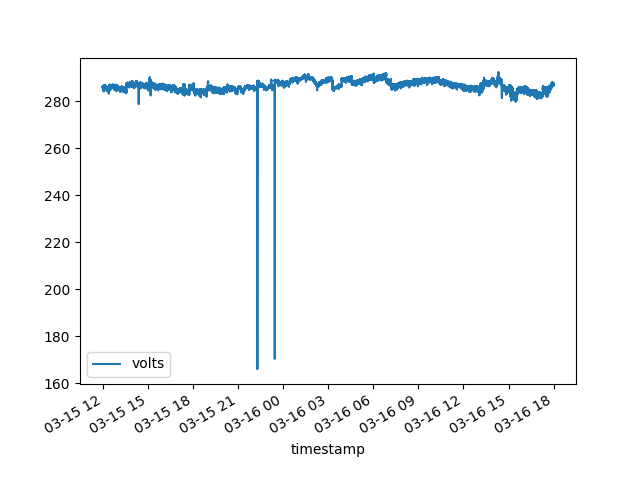

In [3]:
df.plot()

## EKG

An EKG measures the voltage across the heart, which corresponds to the polarization of muscle tissue that makes it contract. Certain periodicities are expected — for example, a regular heartbeat.

In [4]:
df = pd.read_csv(
    "datasets/ekg/ekg.csv.gz", 
    names=['ns', 'timestamp', 's0016lre_i'], 
    index_col='timestamp', 
    parse_dates=True, 
    header=0,
    usecols=['timestamp', 's0016lre_i'],
)

<IPython.core.display.Javascript object>


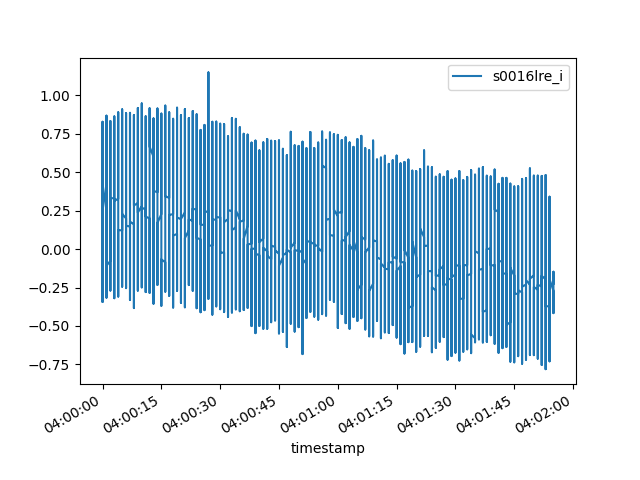

In [5]:
df.plot()

## Retail

You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

In [51]:
df = pd.read_csv(
    "datasets/retail/sales.csv.gz", 
    names=['store', 'dept', 'date', 'sales', 'holiday'], 
    index_col='date', 
    parse_dates=True, 
    header=0,
    usecols=['date', 'dept', 'store', 'sales'],
)

df = df.groupby(['date', 'store'])['sales'].sum().unstack()

<IPython.core.display.Javascript object>


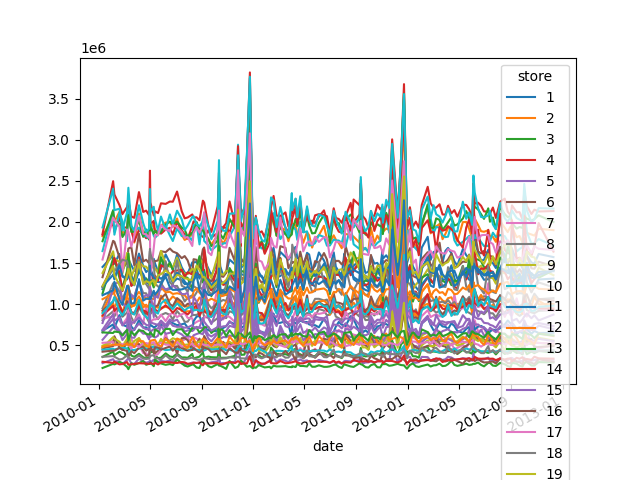

In [52]:
df.plot()

## Stocks

Contains 13 years of daily stock data from 2006-01-01 to 2018-01-01 from the Dow Jones Industrial Average index companies. The files `all_stocks.csv` and the subset `all_stocks_2017.csv` contain all records while the files `[SYM].csv` contain the records for an individual company by their stock ticker name.

In [61]:
df = pd.read_csv(
    "datasets/stocks/all_stocks.csv.gz", 
    names=['date', 'open', 'high', 'low', 'close', 'volume', 'name'], 
    index_col='date', 
    parse_dates=True, 
    header=0,
    usecols=['date', 'close', 'name'],
)

df = df.pivot(columns='name')

<IPython.core.display.Javascript object>


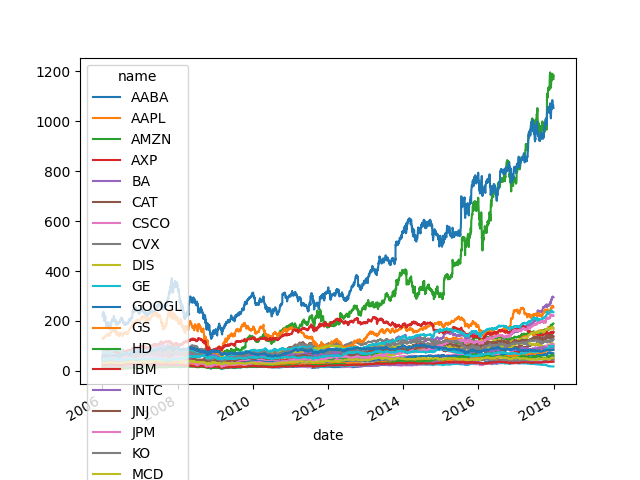

In [63]:
df['close'].plot()

## Energy

Energy consumption data for predicting usage based on weather.

In [64]:
df = pd.read_csv(
    "datasets/energy/nyc_energy.csv.gz", 
    names=['timestamp', 'demand', 'precip', 'temp'], 
    index_col='timestamp', 
    parse_dates=True, 
    header=0,
)

<IPython.core.display.Javascript object>


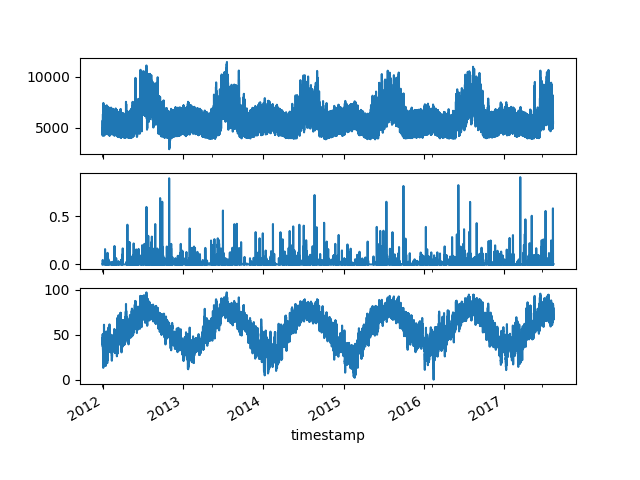

In [66]:
_, axes = plt.subplots(nrows=3, sharex=True)
for i, col in enumerate(['demand', 'precip', 'temp']):
    df[col].plot(ax=axes[i])

## Occupancy

Experimental data used for binary classification (room occupancy) from Temperature,Humidity,Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.

In [75]:
df = pd.read_csv(
    "datasets/occupancy/training.csv.gz", 
    names=['id', 'timestamp', 'temp', 'humidity', 'light', 'co2', 'humidity_ratio', 'occupancy'], 
    index_col='timestamp', 
    parse_dates=True, 
    header=0,
    usecols=['timestamp', 'temp', 'humidity', 'light', 'co2', 'occupancy'],
)

<IPython.core.display.Javascript object>


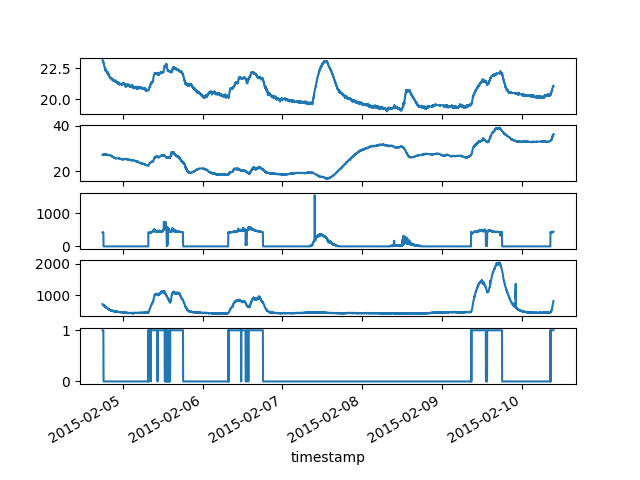

In [78]:
_, axes = plt.subplots(nrows=5, sharex=True)
for i, col in enumerate(['temp', 'humidity', 'light', 'co2', 'occupancy']):
    df[col].plot(ax=axes[i])